<a href="https://colab.research.google.com/github/Binabrata/Quantum-Computing/blob/main/Simon's%20Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit
!pip install qiskit-aer
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=4233ee5a222ede0b3416230948570818b0c053899a00e45234a2c0b537e6accb
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

In [3]:
# Set secret string to ‘10’
s = '10'

# Creating registers
# Set the input qubit register size equal to the length of s
input_qubits = len(str(s))

# Set the total qubits equal to twice the size of input qubits
total_qubits = 2*input_qubits

# Create the quantum circuit
qc = QuantumCircuit(total_qubits,input_qubits)

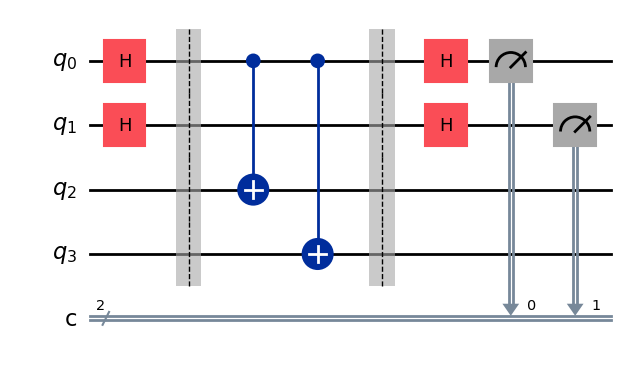

In [4]:
# Apply Hadamard gates before querying the oracle
qc.h(range(input_qubits))
qc.barrier()

# Create the oracle function of the secret string
# As we have only 1 in the first qubit, we apply cx gates only to the first qubit.
for idx in range(input_qubits):
    if(s[idx] == '1'):
        for count in range(input_qubits):
            qc.cx(idx, input_qubits + count)

qc.barrier()

# Apply Hadamard gates to the input register
qc.h(range(len(str(s))))

# Measure ancilla qubits
qc.measure([0,1],[0,1])

qc.draw('mpl')


Total counts are: {'00': 513, '01': 511}


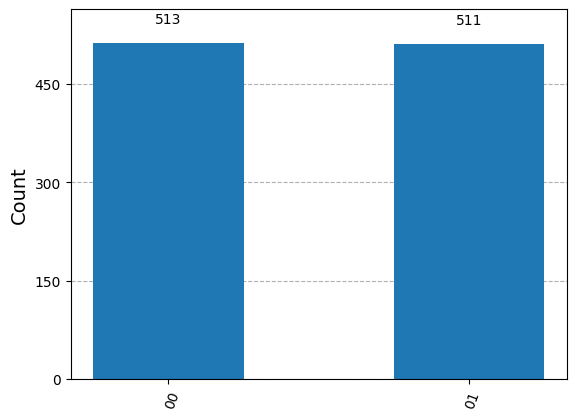

In [5]:
# Test the algorithm
from qiskit import transpile

backend = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, backend)

# Grab results from the job
result = backend.run(compiled_circuit).result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)